In [118]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

**1. Loading the data**

In [18]:
df = pd.read_csv("./data/ENSPRESO_Integrated_NUTS2_Data.csv", delimiter=";")

In [19]:
df.shape

(266, 46)

In [20]:
df.head()

,nuts2_code,biomass_production_twh_medium_total,biomass_production_twh_low_total,biomass_production_twh_high_total,biomass_production_twh_medium_agri&landscape _residues,biomass_production_twh_low_agri&landscape _residues,biomass_production_twh_high_agri&landscape _residues,biomass_production_twh_medium_energy_crops,biomass_production_twh_low_energy_crops,biomass_production_twh_high_energy_crops,...,solar_production_twh_high_total,solar_production_twh_medium_pv_roof,solar_production_twh_low_pv_roof,solar_production_twh_high_pv_roof,solar_production_twh_medium_pv_ground,solar_production_twh_low_pv_ground,solar_production_twh_high_pv_ground,solar_production_twh_medium_csp,solar_production_twh_low_csp,solar_production_twh_high_csp
0,AT11,2.219066,1.854769,3.776925,0.722136,0.461219,1.087997,1.101561,0.998181,1.581197,...,16.80,0.76,0.38,1.34,8.76,4.38,15.46,0.0,0.0,0.0
1,AT12,12.692085,11.106810,21.703167,3.436353,2.087436,4.880631,6.259233,6.022875,7.974069,...,78.95,3.92,1.96,6.91,40.82,20.41,72.04,0.0,0.0,0.0
2,AT13,0.057521,0.054237,0.117569,0.002344,0.002344,0.002344,0.035875,0.032592,0.039422,...,7.29,3.93,1.97,6.94,0.20,0.10,0.35,0.0,0.0,0.0
3,AT21,3.335069,3.106789,8.778625,0.656731,0.453314,0.823814,0.390556,0.365692,1.087939,...,21.70,1.39,0.70,2.46,10.90,5.45,19.24,0.0,0.0,0.0
4,AT22,6.086999,5.484402,15.679258,1.402031,0.859169,1.945031,0.704872,0.645136,1.714189,...,29.78,2.87,1.43,5.06,14.01,7.00,24.72,0.0,0.0,0.0


In [79]:
cols = df.columns.drop("nuts2_code")
target_col = "wind_onshore_production_twh_medium"
feature_cols = [col for col in df.columns if ("medium" in col) and ("wind" not in col) and ("total" not in col)]
feature_cols

['biomass_production_twh_medium_agri&landscape _residues',
 'biomass_production_twh_medium_energy_crops',
 'biomass_production_twh_medium_forestry',
 'solar_capacity_gw_medium_pv_roof',
 'solar_capacity_gw_medium_pv_ground',
 'solar_capacity_gw_medium_csp',
 'solar_production_twh_medium_pv_roof',
 'solar_production_twh_medium_pv_ground',
 'solar_production_twh_medium_csp']

In [6]:
df.isnull().sum()

nuts2_code                                                0
biomass_production_twh_medium_total                       0
biomass_production_twh_low_total                          0
biomass_production_twh_high_total                         0
biomass_production_twh_medium_agri&landscape _residues    0
biomass_production_twh_low_agri&landscape _residues       0
biomass_production_twh_high_agri&landscape _residues      0
biomass_production_twh_medium_energy_crops                0
biomass_production_twh_low_energy_crops                   0
biomass_production_twh_high_energy_crops                  0
biomass_production_twh_medium_forestry                    0
biomass_production_twh_low_forestry                       0
biomass_production_twh_high_forestry                      0
wind_onshore_capacity_gw_medium                           0
wind_onshore_capacity_gw_low                              0
wind_onshore_capacity_gw_high                             0
wind_onshore_production_twh_medium      

There are no missing values present. <br>
There are 46 features and 266 rows are present.

**2. Correlation and Mutual Information Scores Between Features:**

In [87]:
# def get_mi (series):
#     return mutual_info_score(series, df.wind_onshore_production_twh_medium)

mi = mutual_info_regression(df[feature_cols], df[target_col])

mi_scores = pd.Series(mi, index=feature_cols)
# mi_scores = .apply(get_mi)
mi_scores_sorted = mi_scores.sort_values(ascending=False)

In [82]:
correlations = df[feature_cols].corrwith(df.wind_onshore_production_twh_medium)
corr_sorted = correlations.sort_values(ascending=False)

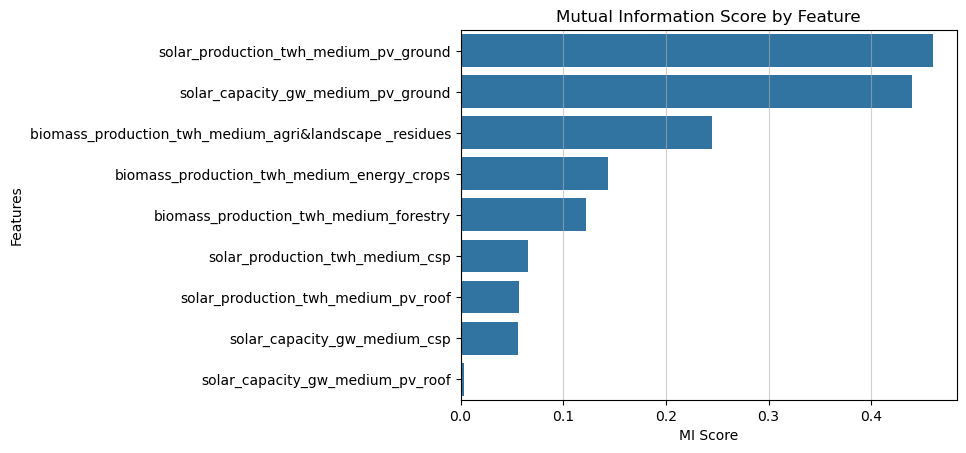

In [83]:
# plt.figure(figsize=(10,10))
sns.barplot(x=mi_scores_sorted.values, y=mi_scores_sorted.index , orient='h')
plt.title("Mutual Information Score by Feature")
plt.xlabel("MI Score")
plt.ylabel("Features")
plt.grid(axis="x", alpha=0.6)
plt.show()

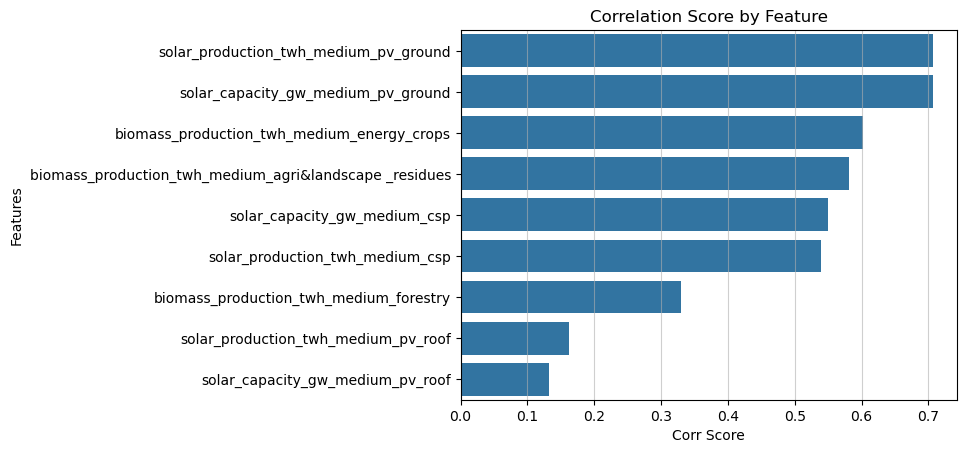

In [84]:
sns.barplot(x=corr_sorted.values, y=corr_sorted.index , orient='h')
plt.title("Correlation Score by Feature")
plt.xlabel("Corr Score")
plt.ylabel("Features")
plt.grid(axis="x", alpha=0.6)
plt.show()

**3. Spliting the data:**

In [93]:
final_df = df[feature_cols]
final_df[target_col] = df[target_col]

C:\Users\Hiu\AppData\Local\Temp\ipykernel_12192\3522406320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df[target_col] = df[target_col]


In [94]:
df_train, df_test = train_test_split(final_df, test_size=0.2, random_state=1)

In [97]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [98]:
y_train = df_train[target_col]
y_test = df_test[target_col]

del df_train[target_col]
del df_test[target_col]

**4. Implementing GridSearchCV:**

In [104]:
model = xgb.XGBRegressor(random_state=1)

params = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

In [107]:
grid_search = GridSearchCV(
    estimator = model,
    param_grid = params,
    cv = 5,
    scoring = 'r2',
    n_jobs = -1,
    verbose = 2
)

In [108]:
print("Starting Grid Search: \n")
grid_search.fit(df_train, y_train)
print("Grid Search Complete")

Starting Grid Search: 

Fitting 5 folds for each of 1024 candidates, totalling 5120 fits
Grid Search Complete


In [113]:
grid_search.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 300,
 'subsample': 0.8}

In [115]:
preds = grid_search.predict(df_test)

In [119]:
r2 = r2_score(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f"R2: {r2}, RMSE: {rmse}")

R2: 0.5750138160234854, RMSE: 23.775260542672637


**Let's try to tune the hyperparameters by ourselves:**

In [120]:
d_train = xgb.DMatrix(df_train, label=y_train, feature_names=feature_cols)
d_test = xgb.DMatrix(df_test, label=y_test, feature_names=feature_cols)

In [123]:
eta = [0.01, 0.05, 0.1, 0.2, 0.3]
max_depth = [4, 5, 6]
boosting_rounds = [50, 100, 150]

In [138]:
scores = []
for e in eta:
    for md in max_depth:
        for br in boosting_rounds:
            xgb_params = {  
            'eta': e,
            'max_depth': md,
            'n_jobs': -1,
            'seed': 1,
            'verbosity': 1,
            }
            model_xgb = xgb.train(xgb_params, d_train, num_boost_round=br)
            preds_xgb = model_xgb.predict(d_test)
            r2_xgb = r2_score(y_test, preds_xgb)
            rmse_xgb = np.sqrt(mean_squared_error(y_test, preds_xgb))
            scores.append([e, md, br, r2_xgb, rmse_xgb])
scores[:5]

[[0.01, 4, 50, 0.13161597376639111, np.float64(33.98551004662643)],
 [0.01, 4, 100, 0.27362688189101503, np.float64(31.082630141237203)],
 [0.01, 4, 150, 0.329556586760243, np.float64(29.86200358468723)],
 [0.01, 5, 50, 0.16369998985490963, np.float64(33.35177329661139)],
 [0.01, 5, 100, 0.2956090889693411, np.float64(30.608690555008838)]]

In [139]:
y_test.describe()

count     54.000000
mean      21.991738
std       36.812628
min        0.000000
25%        1.693307
50%        6.553196
75%       24.040163
max      192.832486
Name: wind_onshore_production_twh_medium, dtype: float64

In [136]:
columns = ["eta", "max_depth", "boosting_rounds", "R2", "RMSE"]
results_df = pd.DataFrame(scores, columns=columns)

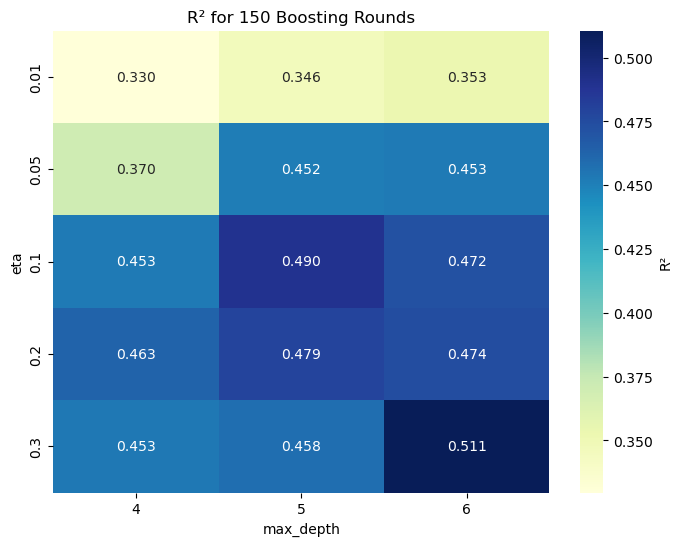

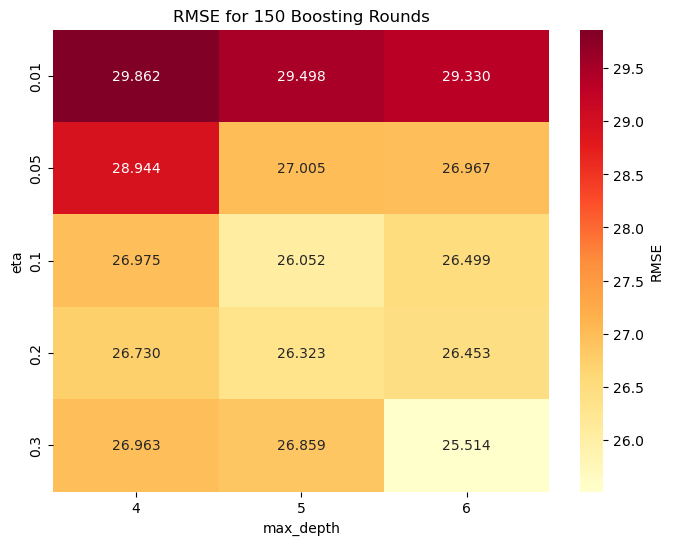

In [ ]:
max_br = results_df["boosting_rounds"].max()
best_br_df = results_df[results_df["boosting_rounds"] == max_br]

r2_pivot = best_br_df.pivot(index="eta", columns="max_depth", values="R2")
plt.figure(figsize=(8, 6))
sns.heatmap(r2_pivot, annot=True, fmt=".3f", cmap="YlGnBu", cbar_kws={"label": "R²"})
plt.title(f"R² for {max_br} Boosting Rounds")
plt.show()

rmse_pivot = best_br_df.pivot(index="eta", columns="max_depth", values="RMSE")
plt.figure(figsize=(8, 6))
sns.heatmap(rmse_pivot, annot=True, fmt=".3f", cmap="YlOrRd", cbar_kws={"label": "RMSE"})
plt.title(f"RMSE for {max_br} Boosting Rounds")
plt.show()


**GridSearchCV returned the best values for R2 and RMSE**